# Biopython continued
## 09/26/2023

<a href="?print-pdf">print view</a><br>
<a href="seqcont.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# Sequence Project

https://MSCBIO.github.io/files/hydra179.aln

Identify the region of this gene with the most variation.

1. For each position, identify and plot the number of unique residues
2. For each position, identify and plot the number of unique subsequences of length 10

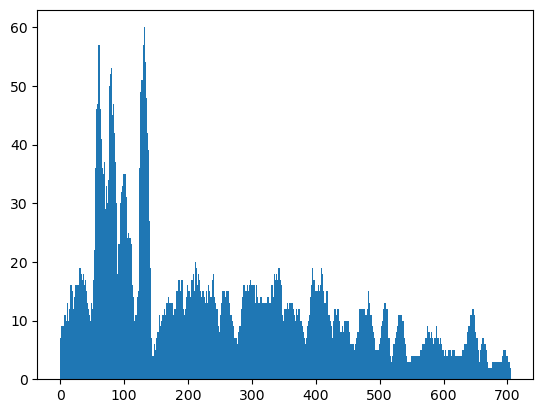

In [2]:
import matplotlib.pyplot as plt
from Bio import AlignIO

def countatpos(seqs,pos):
    '''count the number of unique subsequences of length 10 at pos in seqs'''
    vals = set()
    for s in seqs:
        vals.add(str(s[pos:pos+10].seq))
    return len(vals)

seqs = AlignIO.read("../files/hydra179.aln",'clustal');

xaxis = list()
yaxis = list()
for i in range(seqs.get_alignment_length()):
    xaxis.append(i)
    yaxis.append(countatpos(seqs,i))

plt.bar(xaxis,yaxis,width=1);

<img src="imgs/sequence_project/sequence_project.011.png">

# A bit more python... list comprehensions

A concise way to create lists

`[ <expr of var> for <var> in <iterable> if <condition> ]`

In [3]:
[x for x in range(10) if x % 2 == 0]

[0, 2, 4, 6, 8]

# Three ways to do the same thing

In [4]:
squares = [x**2 for x in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [5]:
squares = []
for x in range(10):
    squares.append(x**2)
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [6]:
squares = list(map(lambda x: x**2, range(10)))
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

# Other comprehensions


In [7]:
list(enumerate('ABCD')) #enumerate returns tuples of index,value

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D')]

### Dictionary comprehension

In [8]:
{key: val for key, val in enumerate('ABCD') if val not in 'CB'}

{0: 'A', 3: 'D'}

### Set comprehension

In [9]:
{v for v in 'ABCDABCD' if v not in 'CB'}

{'A', 'D'}

# Should you use comprehensions?

Sure, if the result is short and easy to understand

But don't go out of your way to use them - they can get ugly fast

In [ ]:
result = [line.strip().split("\t") for line in open("file") if not line.startswith('#')]

In [10]:
%%html
<div id="seq2comp" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#seq2comp';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is in result?",
		answers: ["A","B","C","D","E"],
        extra: ['A list of lists of the tab separated values of lines with #',
                'A list of lists of the tab separated values of lines without #',
                'A list of the lines without #',
                'A list of the tab separated values of lines without #',
                'I have no idea'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

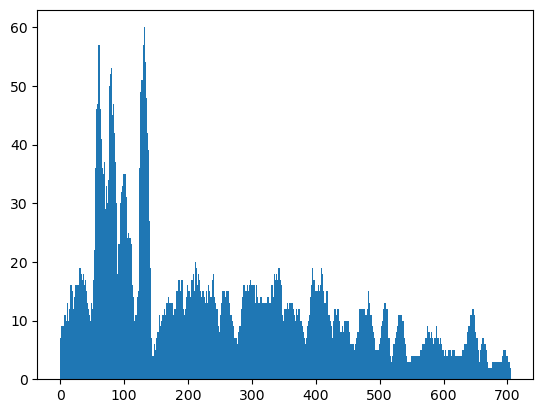

In [11]:
seqs = AlignIO.read("../files/hydra179.aln",'clustal');
yaxis = [len({str(s[i:i+10].seq) for s in seqs}) for i in range(seqs.get_alignment_length())]
plt.bar(range(seqs.get_alignment_length()),yaxis,width=1);

# Back to Biopython...

In [12]:
from Bio import AlignIO
a = AlignIO.read('../files/hydra179.aln','clustal')

In [13]:
len(a)

179

In [14]:
len(a[0]),a.get_alignment_length()

(706, 706)

In [15]:
a

<<class 'Bio.Align.MultipleSeqAlignment'> instance (179 records of length 706) at 1199dbd00>

# Phylogenetic Trees

*A phylogenetic tree or evolutionary tree is a branching diagram or "tree" showing the inferred evolutionary relationships among various biological species or other entities—their phylogeny—based upon similarities and differences in their physical or genetic characteristics.* --Wikipedia

Biopython can read a variety of tree formats: **Newick (clustal)**, NEXUS, phyloXML, NeXML, and CDAO.

In [16]:
from Bio import Phylo
tree = Phylo.read('../files/hydra179.dnd','newick') #must specify format
tree

Tree(rooted=False, weight=1.0)

# Displaying trees

In [17]:
Phylo.draw_ascii(tree)

                  ______ gi|302171738|gb|ADK97770.1|
             ____|
            |    |____ gi|302171740|gb|ADK97771.1|
       _____|
      |     |                               , gi|313105485|gb|ADR32101.1|
      |     |_______________________________|
      |                                     | gi|313105490|gb|ADR32105.1|
      |
      |     , gi|225423246|gb|ACN91129.1|
      |     |
      |     | gi|407380197|gb|AFU11414.1|
      |     |
      |     |, gi|302171754|gb|ADK97778.1|
      |     ||
      |     || gi|407380047|gb|AFU11341.1|
      |     |
      |    ,, gi|407380097|gb|AFU11366.1|
      |    ||
      |    || gi|407380101|gb|AFU11368.1|
      |    ||
      |    || gi|407380017|gb|AFU11326.1|
      |    ||
      |    || gi|407380135|gb|AFU11385.1|
      |    ||
      |    || gi|407380117|gb|AFU11376.1|
      |    |
      |    |, gi|407380023|gb|AFU11329.1|
      |    ||
      |    || gi|407380045|gb|AFU11340.1|
      |    ||
      |    || gi|302171762|gb|ADK97782.1|
 

# Displaying trees

Phylo can draw trees using matplot lib (e.g., can use savefig etc)

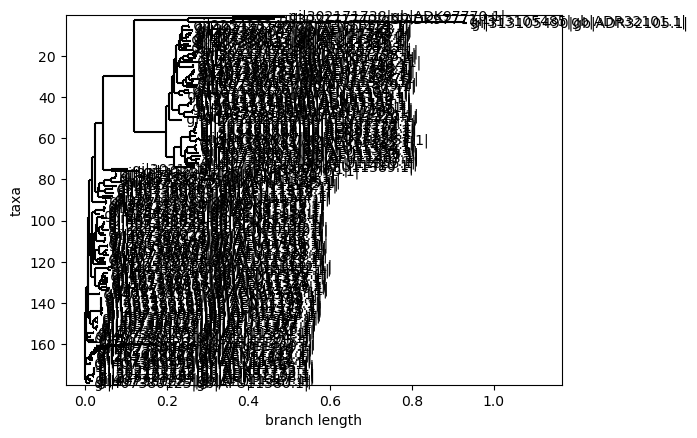

In [18]:
%matplotlib inline
Phylo.draw(tree)

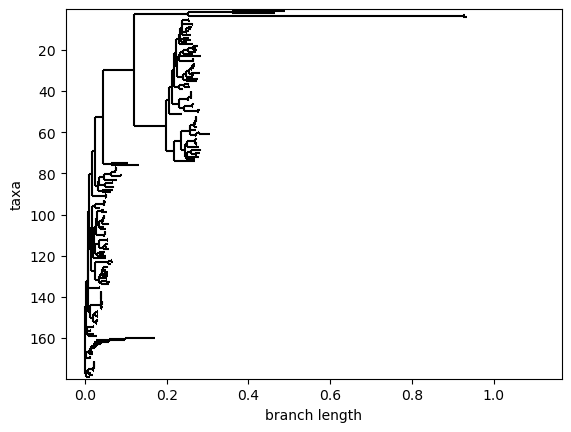

In [19]:
Phylo.draw(tree,label_func=lambda x: None)

# Motifs

*Sequence motifs are short, recurring patterns in DNA that are presumed to have a biological function. Often they indicate sequence-specific binding sites for proteins such as nucleases and transcription factors (TF).* --The Internet


# Motif logos



In [20]:
from Bio import motifs  #lower case for some reason
m = motifs.create(["TACAA","CATGC","TACTA","CCCAA"])

In [21]:
m.counts

{'A': [0, 3, 0, 2, 3],
 'C': [2, 1, 3, 0, 1],
 'G': [0, 0, 0, 1, 0],
 'T': [2, 0, 1, 1, 0]}

In [22]:
m.consensus

Seq('CACAA')

# Motif Logos

Biopython uses [weblogo](http://weblogo.berkeley.edu/)

In [ ]:
m.weblogo('logo.png',alphabet='alphabet_dna',stack_width='large')

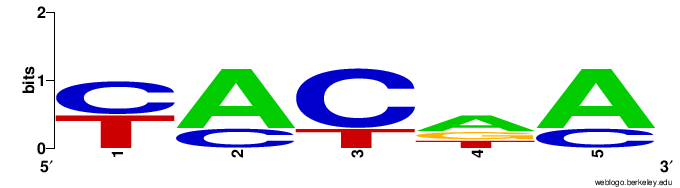

In [23]:
from IPython.display import Image
Image(filename='./logo.png')

# Reading Motifs

Biopython supports a number of motif formats: JASPAR, MEME, TRANSFAC

These formats are associated with databases (JASPAR, TRANSFAC) and tools (MEME).

Of particular interest are sequence motifs for transcription factor binding.

[JASPAR](http://jaspar.genereg.net/)

# Reading Motifs

In [24]:
f = open('../files/MA0004.1.sites') # unlike other parts of Biopython, can't just provide filename to open
arnt = motifs.read(f,'sites') #JASPAR sites

In [25]:
arnt

In [26]:
arnt.consensus

Seq('CACGTG')

In [27]:
print(arnt.counts)

        0      1      2      3      4      5
A:   4.00  19.00   0.00   0.00   0.00   0.00
C:  16.00   0.00  20.00   0.00   0.00   0.00
G:   0.00   1.00   0.00  20.00   0.00  20.00
T:   0.00   0.00   0.00   0.00  20.00   0.00



In [28]:
arnt.instances

[Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('AACGTG'),
 Seq('AACGTG'),
 Seq('AACGTG'),
 Seq('AACGTG'),
 Seq('CGCGTG')]

# Scoring Matrices

The counts attribute can be normalized to represent probabilities at each position

In [29]:
print(arnt.counts.normalize())

        0      1      2      3      4      5
A:   0.20   0.95   0.00   0.00   0.00   0.00
C:   0.80   0.00   1.00   0.00   0.00   0.00
G:   0.00   0.05   0.00   1.00   0.00   1.00
T:   0.00   0.00   0.00   0.00   1.00   0.00



A *pseudocount* is often added at each position to prevent probability from going to zero.

In [30]:
print(arnt.counts.normalize(pseudocounts=0.8))

        0      1      2      3      4      5
A:   0.21   0.85   0.03   0.03   0.03   0.03
C:   0.72   0.03   0.90   0.03   0.03   0.03
G:   0.03   0.08   0.03   0.90   0.03   0.90
T:   0.03   0.03   0.03   0.03   0.90   0.03



# PSSM

The *position-specific scoring matrix* is the position weight matrix (with pseudocounts) expressed as a log (base 2) odds ratios

In [31]:
pwm = arnt.counts.normalize(pseudocounts=0.8)
pssm = pwm.log_odds()
print(pssm)

        0      1      2      3      4      5
A:  -0.27   1.77  -2.86  -2.86  -2.86  -2.86
C:   1.53  -2.86   1.84  -2.86  -2.86  -2.86
G:  -2.86  -1.69  -2.86   1.84  -2.86   1.84
T:  -2.86  -2.86  -2.86  -2.86   1.84  -2.86



A negative value means a nucleotide is less likely than the background at a specific position.

By default a uniform background is assumed, but this can be changed with the `background` parameter of `log_odds`.

In [32]:
%%html
<div id="logpssm" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#logpssm';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the PSSM score for A at a position if it occurs 5 times out of 20 sequences (no pseudocount)?",
		answers: ["-1","-.25","0",".25","1","None of the above"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Search for Motifs

In [33]:
from Bio import SeqIO
from Bio.Seq import Seq
largeseq = SeqIO.read('../files/bnip3.fasta','fasta') #load with same alphabet as motif
smallseq = Seq('AAACCCACGTGACTATATA')

We can search for exact matches

In [34]:
for pos,seq in arnt.instances.search(smallseq):
    print("%i %s" % (pos,seq))

5 CACGTG


In [35]:
for pos,seq in arnt.instances.search(largeseq.seq): # pass sequence, not seqrecord
    print("%i %s" % (pos,seq))

3452 CACGTG
4058 CACGTG
6181 AACGTG
8591 CGCGTG
10719 CACGTG
10998 CACGTG


# Searching for Motifs

In [36]:
results = [(pos,str(seq)) for pos,seq in arnt.instances.search(largeseq.seq)]
len(results)

6

In [37]:
print(results)

[(3452, 'CACGTG'), (4058, 'CACGTG'), (6181, 'AACGTG'), (8591, 'CGCGTG'), (10719, 'CACGTG'), (10998, 'CACGTG')]


In [38]:
arnt.instances

[Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('CACGTG'),
 Seq('AACGTG'),
 Seq('AACGTG'),
 Seq('AACGTG'),
 Seq('AACGTG'),
 Seq('CGCGTG')]

# Searching for Motifs

We can use the PSSM to get a fuzzier match

In [39]:
pwm = arnt.counts.normalize(pseudocounts=0.8)
pssm = pwm.log_odds()
positions = [pos for pos,seq in pssm.search(largeseq.seq)]
len(positions)

1065

In [40]:
results = [(pos,score) for pos,score in pssm.search(largeseq.seq, threshold=4)]
len(results)

167

The score is a $log_2$ likelihood so a score of 4 is $2^4=16$ times more likely to occur as part of the motif than as part of the (uniform) background

In [41]:
results[0]

(508, 5.975107)

# Searching for Motifs

Positions may be negative if the motif was found on the reverse strand.

In [42]:
results[:2]

[(508, 5.975107), (-13823, 6.0461903)]

In [43]:
pos = results[1][0] #-13823
hit = largeseq.seq[pos:pos+len(arnt)]  #negative indices can still be used to retrieve matched subsequence

In [44]:
print(pos,len(largeseq)+pos)
print(hit, hit.reverse_complement())

-13823 508
CACGGG CCCGTG


In [45]:
print(arnt.counts)

        0      1      2      3      4      5
A:   4.00  19.00   0.00   0.00   0.00   0.00
C:  16.00   0.00  20.00   0.00   0.00   0.00
G:   0.00   1.00   0.00  20.00   0.00  20.00
T:   0.00   0.00   0.00   0.00  20.00   0.00



# Some more marine biology

<img src="https://c2.staticflickr.com/4/3285/3293134375_635141a7b3_b.jpg">

# Your Herculean Task

&nbsp;&nbsp;0\. Get input files of 179 hydra sequences

In [ ]:
!wget https://MSCBIO2025.github.io/files/hydra179.aln
!wget https://MSCBIO2025.github.io/files/hydra179.dnd
!wget https://MSCBIO2025.github.io/files/hydra179.fasta

 2. Display the phylogenetic tree from the clustal alignment (hydra179.dnd)
 3. Identify the subsequence of length 20 that has the most variation amount these sequences (like last time)
 4. Use clustal to compute the multiple alignment of these 179 length 20 subsequences
 5. Display the phylogenetic tree from this alignment

In [46]:
#!/usr/local/bin/python
from Bio import SeqIO
from Bio import AlignIO
from Bio.Seq import Seq
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import sys

sys.argv = ['fake','../files/hydra179.aln']
a = AlignIO.read(sys.argv[1],'clustal')

#the following is perhaps not the most readable, but it counts
#the number of unique sequences of length 20 at each position in align
cnts = [len({str(s.seq) for s in a[:,i:i+20]}) for i in range(len(a[0])-20)]

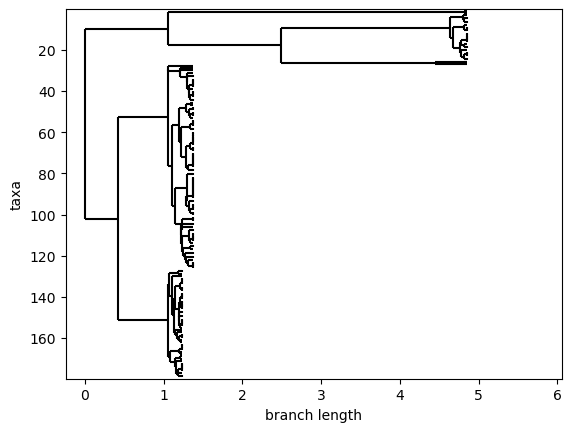

In [47]:
maxpos = cnts.index(max(cnts))
maxseqs = a[:,maxpos:maxpos+20]

# have to write out to a file to compute msa with clustal
out = open('subalign.fasta','w')
SeqIO.write(maxseqs, out, 'fasta')
out.close() # must close before reading 

cline = ClustalwCommandline("clustalw", infile="subalign.fasta", outfile='subalign.aln')
# cline()

# msa of the subsequences
maxalign = AlignIO.read('subalign.aln','clustal')

tree = Phylo.read('subalign.dnd','newick')
tree.root.branch_length = 0 #prettier
Phylo.draw(tree,label_func=lambda x: None)